### Uploading networks 
We load networks from csv files with edges and nodes. Thanks to Lisa for inspiration and data from https://github.com/lhehnke/openscience-publications/blob/master/data/nodes_countries.csv

Processed 67 lines.
Processed 468 lines.


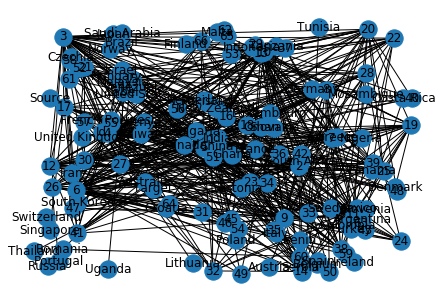

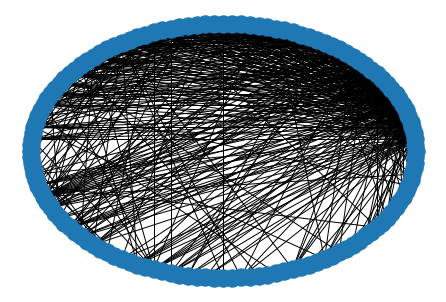

In [6]:
#Read networks from file 

import networkx as nx 
import csv
import matplotlib.pyplot as plt

G = nx.Graph() # create an empty graph


with open('nodes_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_node(row[0])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        line_count += 1
        G.add_edge(row[0],row[1])
        #nx.draw(G, with_labels = True)
    print(f'Processed {line_count} lines.')



with open('edges_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_edge(row[0], row[1])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        #find attribute number in array of nodes
        #plot name of that node
        line_count += 1
    print(f'Processed {line_count} lines.')


    
#draw different layouts    
nx.draw_random(G,with_labels = True)
plt.show()
nx.draw_circular(G)
#plt.show()
#nx.draw_spectral(G)
plt.show()
    
#draw graph with labels 

    

### Analyzing graphs

The networks are quite messy and full of links, therefore we perform some simple network analysis on them.
The structure of G can be analyzed using various graph-theoretic functions such as: linear ones (degree), non-linear ones (betweenness etc.)


drawing measures for graph


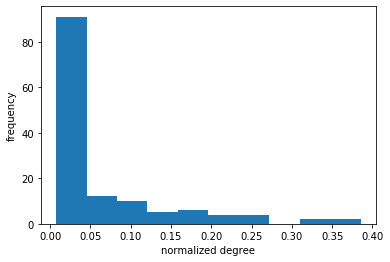

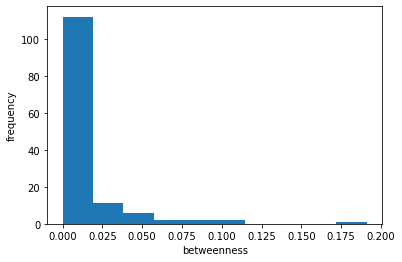

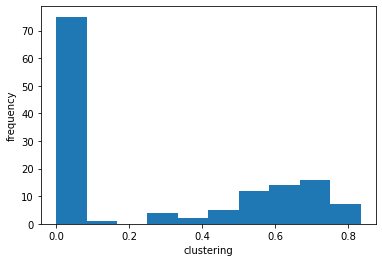

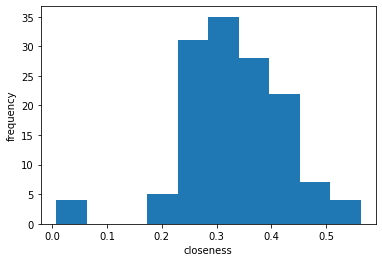

calculating global measures
average neighbor degree {1: 14.342857142857143, 52: 17.115384615384617, 36: 21.25, 43: 19.74418604651163, 48: 18.333333333333332, 44: 19.40909090909091, 35: 21.314285714285713, 28: 23.535714285714285, 32: 22.28125, 31: 21.903225806451612, 26: 24.78846153846154, 27: 25.666666666666668, 22: 25.71212121212121, 21: 26.071428571428573, 19: 28.5, 14: 26.785714285714285, 23: 24.695652173913043, 15: 27.666666666666668, 10: 32.1, 16: 27.6875, 9: 30.955555555555556, 20: 25.55, 4: 15.958333333333334, 11: 30.727272727272727, 13: 28.46153846153846, 7: 29.892857142857142, 6: 26.083333333333332, 12: 29.25, 8: 30.375, 5: 29.966666666666665, 3: 19.77777777777778, 2: 12.75}
average neighbor degree {'Id': 1.0, 'Label': 1.0, '1': 17.115384615384617, 'United States': 52.0, '2': 21.25, 'Canada': 36.0, '3': 19.74418604651163, 'Germany': 43.0, '4': 18.333333333333332, 'United Kingdom': 48.0, '5': 19.40909090909091, 'Netherlands': 44.0, '6': 21.314285714285713, 'Spain': 35.0, '7': 2

DegreeView({'Id': 1, 'Label': 1, '1': 52, 'United States': 1, '2': 36, 'Canada': 1, '3': 43, 'Germany': 1, '4': 48, 'United Kingdom': 1, '5': 44, 'Netherlands': 1, '6': 35, 'Spain': 1, '7': 28, 'Italy': 1, '8': 32, 'Australia': 1, '9': 31, 'France': 1, '10': 26, 'Belgium': 1, '11': 32, 'Sweden': 1, '12': 26, 'China': 1, '13': 27, 'Japan': 1, '14': 22, 'Finland': 1, '15': 21, 'Czechia': 1, '16': 19, 'South Korea': 1, '17': 14, 'Singapore': 1, '18': 22, 'Brazil': 1, '19': 22, 'Denmark': 1, '20': 23, 'Austria': 1, '21': 14, 'Nigeria': 1, '22': 15, 'Poland': 1, '23': 28, 'Switzerland': 1, '24': 10, 'Taiwan': 1, '25': 21, 'South Africa': 1, '26': 16, 'Portugal': 1, '27': 14, 'Malaysia': 1, '28': 15, 'Turkey': 1, '29': 9, 'Russia': 1, '30': 20, 'New Zealand': 1, '31': 4, 'Croatia': 1, '32': 11, 'Mexico': 1, '33': 13, 'Tunisia': 1, '34': 4, 'Tanzania': 1, '35': 4, 'Ghana': 1, '36': 7, 'Bulgaria': 1, '37': 9, 'Greece': 1, '38': 19, 'Ireland': 1, '39': 13, 'Norway': 1, '40': 6, 'Iran': 1, '41':

In [9]:
import numpy as np



print('drawing measures for graph')
plt.hist(list(nx.degree_centrality(G).values()))
plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
plt.ylabel('frequency')
plt.show()



plt.hist(list(nx.betweenness_centrality(G).values()))
plt.xlabel('betweenness')
plt.ylabel('frequency')
plt.show()



plt.hist(list(nx.clustering(G).values()))
plt.xlabel('clustering')
plt.ylabel('frequency')
plt.show()



plt.hist(list(nx.closeness_centrality(G).values()))
plt.xlabel('closeness')
plt.ylabel('frequency')
plt.show()

print('calculating global measures')

print('average neighbor degree', nx.average_degree_connectivity(G))

print('average neighbor degree', nx.average_neighbor_degree(G))

print('average clustering')
avclus = nx.average_clustering(G)
print(avclus)



components = nx.connected_components(G)
print('components', components)
#[[1, 2, 3], ['spam']]


nx.clustering(G)
#{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}


nx.degree(G)
#Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}

